Curve alphabets = B,C,D,G,J,O,P,Q,R,S,U

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import plot_confusion_matrix, classification_report

In [2]:
df=pd.read_csv("letters.csv")

In [3]:
list1=["B","C","D","G","J","O","P","Q","R","S","U"]

In [4]:
df = df[df.lettr.isin(list1)]

In [5]:
df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7


In [6]:
df.tail()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
19991,O,4,3,5,4,2,7,6,8,8,6,5,7,3,8,4,8
19993,J,2,11,3,8,2,15,4,4,5,13,1,8,0,7,0,8
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8485 entries, 2 to 19998
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   8485 non-null   object
 1   x-box   8485 non-null   int64 
 2   y-box   8485 non-null   int64 
 3   width   8485 non-null   int64 
 4   high    8485 non-null   int64 
 5   onpix   8485 non-null   int64 
 6   x-bar   8485 non-null   int64 
 7   y-bar   8485 non-null   int64 
 8   x2bar   8485 non-null   int64 
 9   y2bar   8485 non-null   int64 
 10  xybar   8485 non-null   int64 
 11  x2ybar  8485 non-null   int64 
 12  xy2bar  8485 non-null   int64 
 13  x-ege   8485 non-null   int64 
 14  xegvy   8485 non-null   int64 
 15  y-ege   8485 non-null   int64 
 16  yegvx   8485 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 1.2+ MB


In [8]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
count,8485.000000,8485.000000,8485.000000,8485.000000,8485.000000,8485.000000,8485.000000,8485.000000,8485.000000,8485.000000,8485.000000,8485.000000,8485.000000,8485.000000,8485.000000,8485.000000
mean,4.031467,7.032882,4.979847,5.439953,3.612846,7.262345,7.234885,5.734708,5.327401,8.449263,6.078374,7.969240,2.778197,8.200118,4.394814,8.235003
std,1.824857,3.306977,1.793814,2.278537,2.114174,1.774207,1.786219,2.253339,1.906232,2.403278,2.059490,2.400617,1.783039,1.254985,2.357324,1.605015
min,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,4.000000,4.000000,7.000000,5.000000,6.000000,2.000000,7.000000,3.000000,7.000000
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,6.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,8.000000,7.000000,7.000000,10.000000,7.000000,9.000000,3.000000,9.000000,6.000000,9.000000
max,13.000000,15.000000,11.000000,15.000000,14.000000,15.000000,15.000000,15.000000,12.000000,15.000000,15.000000,15.000000,12.000000,15.000000,15.000000,15.000000


In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
lettr,8485,11,U,813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x-box,8485.0,NaN,NaN,NaN,4.031467,1.824857,0.0,3.0,4.0,5.0,13.0
y-box,8485.0,NaN,NaN,NaN,7.032882,3.306977,0.0,5.0,7.0,9.0,15.0
width,8485.0,NaN,NaN,NaN,4.979847,1.793814,1.0,4.0,5.0,6.0,11.0
high,8485.0,NaN,NaN,NaN,5.439953,2.278537,0.0,4.0,6.0,7.0,15.0
onpix,8485.0,NaN,NaN,NaN,3.612846,2.114174,0.0,2.0,3.0,5.0,14.0
x-bar,8485.0,NaN,NaN,NaN,7.262345,1.774207,2.0,6.0,7.0,8.0,15.0
y-bar,8485.0,NaN,NaN,NaN,7.234885,1.786219,1.0,6.0,7.0,8.0,15.0
x2bar,8485.0,NaN,NaN,NaN,5.734708,2.253339,0.0,4.0,6.0,7.0,15.0
y2bar,8485.0,NaN,NaN,NaN,5.327401,1.906232,0.0,4.0,5.0,7.0,12.0


In [10]:
df.isnull().sum()

lettr     0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64

In [11]:
df.duplicated().sum()

333

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.shape

(8152, 17)

### Outlier Treatment

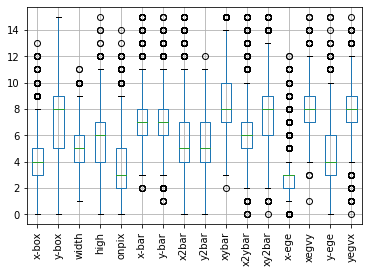

In [15]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [16]:
def treat_outliers(x):
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    IQR=q3-q1
    lower_bound=q1-(1.5*IQR)
    upper_bound=q3+(1.5*IQR)
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [17]:
df_num=df.select_dtypes(exclude="object")
num_list=df_num.columns
num_list

Index(['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar',
       'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'x-ege', 'xegvy', 'y-ege',
       'yegvx'],
      dtype='object')

In [18]:
for i in num_list:
    df[i]=treat_outliers(df[i])

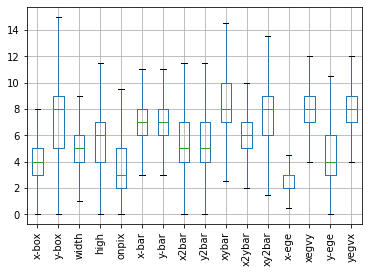

In [19]:
df[num_list].boxplot()
plt.xticks(rotation=90)
plt.show()

### Spliting of data

In [20]:
x = df.drop("lettr",axis=1)
y = df.lettr

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=123)

In [22]:
x_train.shape

(5706, 16)

In [23]:
x_test.shape

(2446, 16)

### Standard scaler

In [24]:
sclr = StandardScaler()

In [25]:
x_train = sclr.fit_transform(x_train)

In [26]:
x_test = sclr.transform(x_test) #to keep it as unseen data

## SVM

In [27]:
from sklearn.svm import SVC

In [28]:
svc = SVC()

In [29]:
svc.fit(x_train,y_train)

SVC()

In [30]:
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)

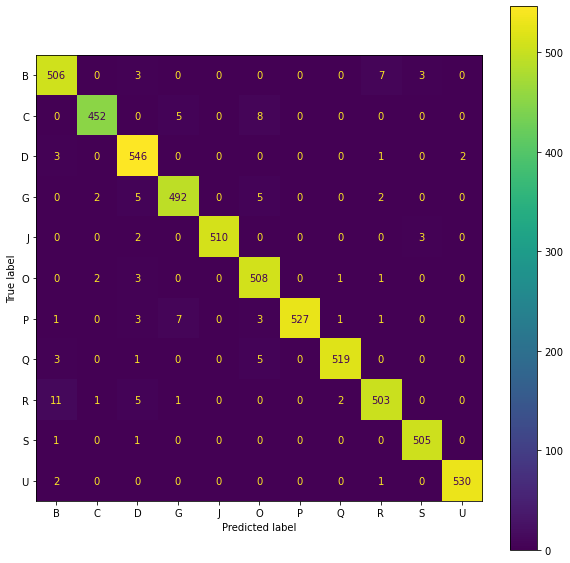

In [31]:
fig, ax = plt.subplots( figsize=(10, 10))
plot_confusion_matrix(svc,x_train,y_train, ax=ax)

In [32]:
print(classification_report(y_train,y_pred_train)) #train 98

              precision    recall  f1-score   support

           B       0.96      0.97      0.97       519
           C       0.99      0.97      0.98       465
           D       0.96      0.99      0.97       552
           G       0.97      0.97      0.97       506
           J       1.00      0.99      1.00       515
           O       0.96      0.99      0.97       515
           P       1.00      0.97      0.99       543
           Q       0.99      0.98      0.99       528
           R       0.97      0.96      0.97       523
           S       0.99      1.00      0.99       507
           U       1.00      0.99      1.00       533

    accuracy                           0.98      5706
   macro avg       0.98      0.98      0.98      5706
weighted avg       0.98      0.98      0.98      5706



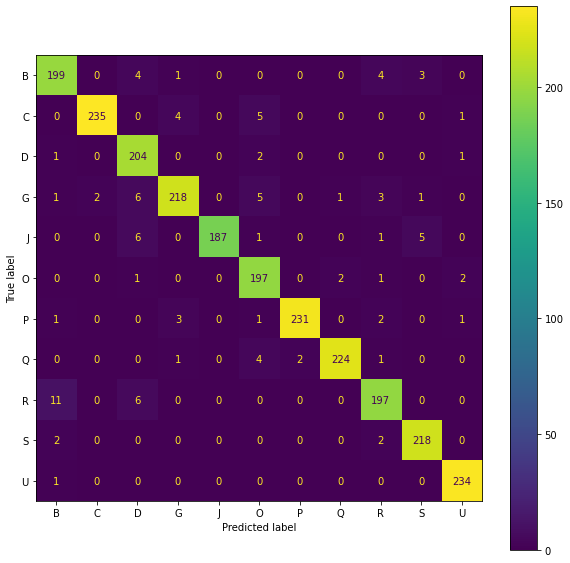

In [33]:
fig, ax = plt.subplots( figsize=(10, 10))
plot_confusion_matrix(svc,x_test,y_test,ax=ax)

In [34]:
print(classification_report(y_test,y_pred_test)) #96

              precision    recall  f1-score   support

           B       0.92      0.94      0.93       211
           C       0.99      0.96      0.98       245
           D       0.90      0.98      0.94       208
           G       0.96      0.92      0.94       237
           J       1.00      0.94      0.97       200
           O       0.92      0.97      0.94       203
           P       0.99      0.97      0.98       239
           Q       0.99      0.97      0.98       232
           R       0.93      0.92      0.93       214
           S       0.96      0.98      0.97       222
           U       0.98      1.00      0.99       235

    accuracy                           0.96      2446
   macro avg       0.96      0.96      0.96      2446
weighted avg       0.96      0.96      0.96      2446



## Tuning

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid = {"kernel" :["linear","rbf","poly"],
             "C" : [0.1,1,10,100],
             "gamma" : [0.0001,0.01,0.1,1,10]}

svc1 = SVC(random_state=10)
grid_search = GridSearchCV(estimator=svc1,param_grid=param_grid,cv = 5)

In [37]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=10),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [38]:
grid_search.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [39]:
svc1 = grid_search.best_estimator_

In [40]:
y_pred_train = svc1.predict(x_train)
y_pred_test = svc1.predict(x_test)

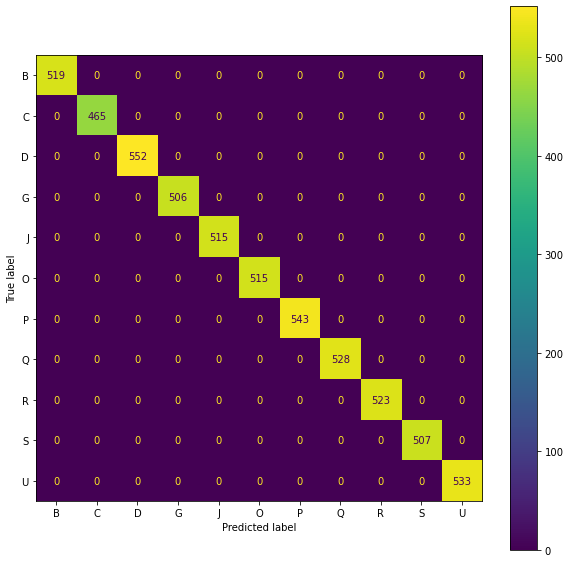

In [41]:
fig, ax = plt.subplots( figsize=(10, 10))
plot_confusion_matrix(svc1,x_train,y_train,ax=ax)

In [42]:
print(classification_report(y_train,y_pred_train)) #train 100

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       519
           C       1.00      1.00      1.00       465
           D       1.00      1.00      1.00       552
           G       1.00      1.00      1.00       506
           J       1.00      1.00      1.00       515
           O       1.00      1.00      1.00       515
           P       1.00      1.00      1.00       543
           Q       1.00      1.00      1.00       528
           R       1.00      1.00      1.00       523
           S       1.00      1.00      1.00       507
           U       1.00      1.00      1.00       533

    accuracy                           1.00      5706
   macro avg       1.00      1.00      1.00      5706
weighted avg       1.00      1.00      1.00      5706



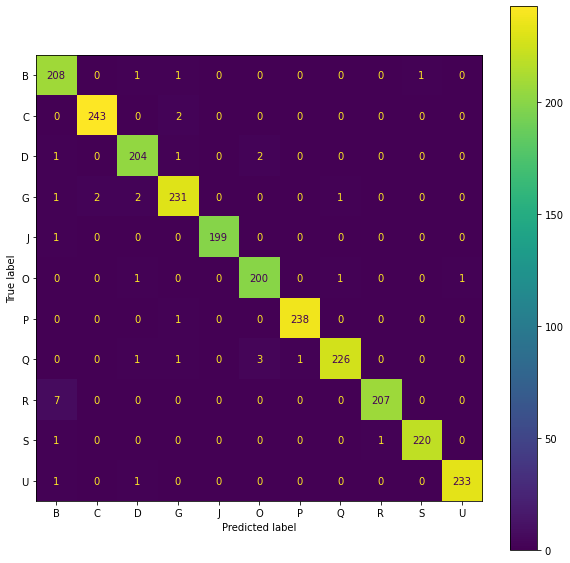

In [43]:
fig, ax = plt.subplots( figsize=(10, 10))
plot_confusion_matrix(svc1,x_test,y_test,ax=ax)

In [44]:
print(classification_report(y_test,y_pred_test)) #test 98

              precision    recall  f1-score   support

           B       0.95      0.99      0.97       211
           C       0.99      0.99      0.99       245
           D       0.97      0.98      0.98       208
           G       0.97      0.97      0.97       237
           J       1.00      0.99      1.00       200
           O       0.98      0.99      0.98       203
           P       1.00      1.00      1.00       239
           Q       0.99      0.97      0.98       232
           R       1.00      0.97      0.98       214
           S       1.00      0.99      0.99       222
           U       1.00      0.99      0.99       235

    accuracy                           0.98      2446
   macro avg       0.98      0.98      0.98      2446
weighted avg       0.99      0.98      0.98      2446

